<h1>HW4</h1>

# Question 1
### (Binomial) Read the following example and complete the exercises 

#### Tossing a Biased Coin
You are asked if you want to bet on a coin. 
```
You have 10 coin tosses. 
```
```
If you get exactly 5 heads, you win 30 dollars. 
```
```
Otherwise you loss 10 dollars. 
```
```
Based on our previous observation, the coin is biased. The chance of getting head is approximately 0.4. 
```
Now you need to think about if you want to play it or not. 

### 1.1 

You recall that binomial distribution is commonly used to determine the probability of observing a specified number of successful outcomes in a specified number of trials. The equation for pdf of binomial distribution is: 

\begin{equation*}
P(X = k) = \frac{n!}{k!(n-k)!}p^k(1-p)^{n-k}
\end{equation*}

Where 
```
k: Number of successful trials
n: Total number of trials
p: Probability of success in one trial
```

Create a functon to calculate the pdf of a binomial distribution

```
Function name: binomial_p
```
```
Input: n, k, p
```
```
Output: pdf of a binomial distribution
```
```
Example: binomial_p(10, 2, 0.4) = 0.12093235199999998
```

In [145]:
import Pkg
Pkg.add("Distributions")
using Distributions, Statistics

   Resolving package versions...
  No Changes to `C:\Users\Carly\.julia\environments\v1.8\Project.toml`
  No Changes to `C:\Users\Carly\.julia\environments\v1.8\Manifest.toml`


In [146]:
n = 10
k = 2
p = 0.4
function binomial_p(n,k,p)
    pdf = (factorial(n))/(factorial(k) .* factorial(n-k)) * ((p) .^ (k)) .* ((1-p) .^ (n-k))
    return(pdf)
end

binomial_p (generic function with 1 method)

In [147]:
binomial_p(10,2,0.4)   

0.12093235199999998

### 1.2 

Now you want to use the function to calculate the probabilities of 
1. Winning the bet
2. Losing the bet

The chance of winning the bet:

In [148]:
succp = binomial_p(10,5,0.4)   # probability of win   

0.20065812480000003

The chance of losing the bet:

In [149]:
failp = 1-succp     # probability of lose  

0.7993418752

### 1.3

Would you expect yourself earning or losing money in the game?

\*Hint: What is the expected outcome

In [150]:
E = succp * 30 + failp * -10 

-1.973675007999999

# 1.3
I would lose money because the expected outcome is a negative.

### 1.4

1. What if you need to get exactly 4 heads to win the game? What are the probabilities of winning and losing? 

2. Would you expect yourself earning or losing money in this case?

In [151]:
succp2 = binomial_p(10,4,0.4)

0.250822656

In [152]:
failp2 = 1-succp2

0.749177344

In [153]:
E2 = succp2 * 30 + failp2 * -10 

0.03290623999999909

# 1.4.2
The expected outcome is positive in this case, so I would win.

# Question 2
### (Chi-Square) Complete the following exercises 


#### Run the following three cells to define x, y_true, noise, and y_oberved

1. x = 0:1:10
2. y_true = 3x - 2
3. noise = N(0, $\sigma$ = 3)
4. y_observed = y_true + noise


In [154]:
import Pkg
Pkg.add(["Distributions", "Plots", "Polynomials", "Random", "Statistics"])

   Resolving package versions...
  No Changes to `C:\Users\Carly\.julia\environments\v1.8\Project.toml`
  No Changes to `C:\Users\Carly\.julia\environments\v1.8\Manifest.toml`


In [155]:
import Distributions as di
import Plots
import Polynomials
import Random
import Statistics

In [156]:
x = 0:1:10
y_true = 3 .* x .- 2
sigma = 3
noise = Random.rand(di.Normal(0,sigma),length(x))
#d = di.Normal(0,sigma)
#noise = rand(d,length(x))
y_observed = y_true .+ noise

11-element Vector{Float64}:
  1.0827592362790073
  0.26733710649734
  2.0576362147633978
  9.526790705504153
  9.358158921540618
 13.534528232712697
 18.981477362148077
 15.556727285166808
 19.670304208971093
 26.349736571398868
 28.10888423150134

### 2.1

1. Fit the data with a first order polynomial
2. Store the coefficients of the fitted polynomial in fit_coeff

In [157]:
using Polynomials: Polynomial, fit, coeffs
polyfit = Polynomials.fit(x,y_observed,1)
#polyfit= fit(x, y_observed, 1)

Polynomial(-1.1360335575139453 + 2.8543765310752147*x)

In [158]:
fit_coeff = coeffs(polyfit)

2-element Vector{Float64}:
 -1.1360335575139453
  2.8543765310752147

### 2.2

Given $\chi^2$ defined as:
$$\chi^{2}=\sum_{i}^{N}{\frac{(y_{i}-f(x_{i},\theta))^2}{\sigma_{i}^2}}$$

Create a function to calculate Chi-square value for the $1^{st}$ order polynomial fit

```
Function name: chisqr
```
```
Input: b, m, x, y_observed, sigma
```
```
m and b are the coefficients in the first order polynomial in which m * x + b = y_fit
```
```
Output: Chi-square value of the polynomial model
```

In [159]:
function Chisqr(b, m, x, y_observed, sigma)
    return sum(( y_observed .- m .* x .- b).^2 ./ sigma.^2)
end

Chisqr (generic function with 1 method)

In [160]:
y_observed = y_true .+ noise
fit_coeff = coeffs(fit(x,y_observed,1))
Chisqr(fit_coeff[1],fit_coeff[2],x,y_observed,sigma)

5.151789257509441

### 2.3

\* Don't define random seed anywhere in the notebook
1. Create a empty list chi2_list
2. Use a for/while loop to run through the data simulation and model fitting (as done in the previous steps) 10000 times
3. In each iteration, calculate the Chi-square value for the fitted model and add it to the chi2_list


In [162]:
chi2_list = []
for i in 1:10000
    noise = Random.rand(di.Normal(0,sigma),length(x))
    #y_true = 3 .* x .- 2
    #noise = rand(d,length(x))
    y_observed = y_true .+ noise
    fit_coeff = coeffs(fit(x,y_observed,1))
    push!(chi2_list,Chisqr(fit_coeff[1],fit_coeff[2],x,y_observed,sigma))
end

In [163]:
chi2_list

10000-element Vector{Any}:
  6.150134879499166
  2.1003165738595126
  4.885311570174286
  2.4829882257137954
 11.740830457857008
  9.036439249705486
  9.396218677033763
 10.87940924225021
 12.487162778350761
 15.276944881730754
  5.670855548300474
 13.084535084584903
  6.063361235679489
  ⋮
  8.145022114262753
  6.202623104250475
  7.622407256184354
 13.366887806218498
  9.112327677200081
  8.07592579499569
 14.003510854206324
  9.3904434598076
  6.76642301540503
  4.8519719014712415
  8.039062242017112
  6.225750454542017

### 2.4

1. Calculate the mean of chi2_list
2. Explain if the mean value (degree of freedom) make sense or not


In [164]:
using Statistics

In [165]:
mean(chi2_list)

9.041022537702261

# 2.4.2
The chi squared mean, or degrees of freedom, does make sense because it should equal the number of samples being summed. 

### 2.5

1. Define a Chi-square distribution using the Degree of freedom from 2.4
2. Generate x_dist = 0:0.1:30
3. Calculate pdf of the Chi-square distribution using x_dist
4. Plot the chi2_list in a histogram with bin = 50 
5. Plot the pdf on top of the chi2_list histogram 

In [166]:
using Plots
import Distributions as di
using Random
using Polynomials: Polynomial, fit, coeffs
using Statistics

In [168]:
x_dist = 0:0.1:30
chi2 = di.Chisq(9.041022537702261)

Chisq{Float64}(ν=9.041022537702261)

In [169]:
di.pdf.(chi2,x_dist)

301-element Vector{Float64}:
 0.0
 1.0445412998686955e-6
 1.1402245408814415e-5
 4.520712846976675e-5
 0.00011839692630183867
 0.0002470577583579229
 0.00044652136273584604
 0.0007308267660213046
 0.0011124001107931237
 0.0016018776096928407
 0.002208026941151946
 0.0029377379839059196
 0.003796062803247919
 ⋮
 0.0002683512753505807
 0.00025838675786789544
 0.0002487818319449925
 0.00023952398858365553
 0.00023060113289128165
 0.00022200157132486653
 0.00021371399928410973
 0.00020572748904617986
 0.00019803147803470287
 0.00019061575741562926
 0.000183470461012683
 0.00017658605453516312

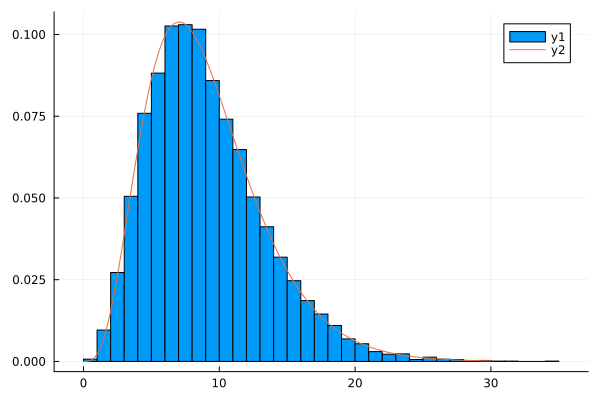

In [170]:
using Plots
x_dist = 0:0.1:30
chi2 = di.Chisq(9.041022537702261)
histogram(chi2_list, bin=50, normalize=true)
plot!(x_dist,di.pdf.(chi2,x_dist))

### 2.6

Given the likelihood is:
$$P(\{y_{i}(x_{i})\}\mid \theta)\propto \exp\big(-\frac{\chi^2}{2}\big)$$

1. Run the following cell to create a function to calculate the likelihood (make sure you named the variables as asked in the previous questions)
2. Define m_range = 1:0.01:5
3. Define b_range = -7:0.01:3
4. Make a contour plot to visualize the distribution of the likelihood


In [109]:
chi2poly(b, m) = chisqr(b, m, x, y_observed, sigma)
p_chi2poly(b, m) = exp(-chi2poly(b, m)/2);

In [110]:
b_range = -7:0.01:3
m_range = 1:0.01:3

1.0:0.01:3.0

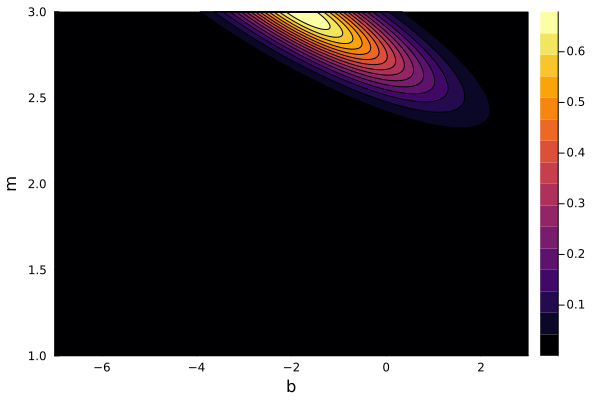

In [115]:
using Plots
contourf(b_range,m_range,p_chi2bm,xlabel = "b", ylabel = "m")

### 2.7

1. Redefine x = 0:0.5:5 and update y_observed. Plot the likelihood with the new x, y_observed and explain how the plot is different from 2.6
2. Redefine x = 0:2:20 and update y_observed. Plot the likelihood with the new x, y_observed and explain how the plot is different from 2.6

In [118]:
x = 0:0.5:5
y_true = 3 .* x .- 2
sigma = 3
noise = Random.rand(di.Normal(0,sigma),length(x))
y_observed1 = y_true .+ noise

11-element Vector{Float64}:
 -1.5213782294792724
 -5.273315403066815
  1.612158186420659
 -0.22941162727422304
  5.271809697326389
  5.871410859439772
 12.592741891256106
  8.89236005472911
 13.38652254218426
  5.081108819255487
 18.210045287032674

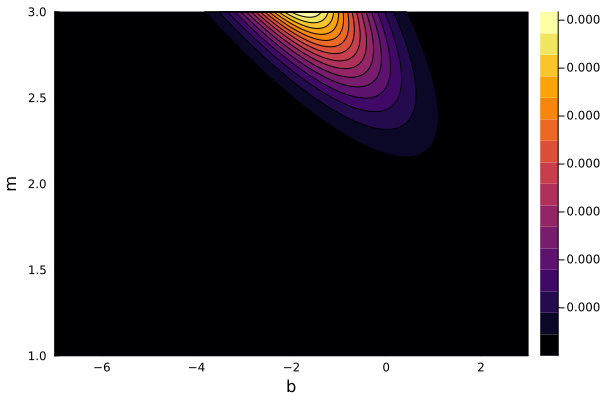

In [122]:
chi2bm(b,m) = Chisqr(b,m,x,y_observed1,sigma)
contourf(b_range,m_range,p_chi2bm,xlabel = "b", ylabel = "m")

# 2.7.1
The contour plot for 2.7 appears steeper with a slightly more inclined slope than in the contour plot shown in 2.6. A steeper slope corresponds to a greater (broader) range. 

In [123]:
x = 0:2:20

0:2:20

In [124]:
y_true = 3 .* x .- 2
sigma = 3
# d = di.Normal(0,sigma)
# noise = rand(d,length(x))
noise = Random.rand(di.Normal(0,sigma),length(x))
y_observed2 = y_true .+ noise

11-element Vector{Float64}:
 -2.3677194867366262
  3.216934001916133
  9.409250677831707
 16.618462066977504
 24.096890925945246
 25.47576372712189
 39.942319519463304
 39.98405994084268
 41.46715078043214
 49.48692286582701
 58.25455068910045

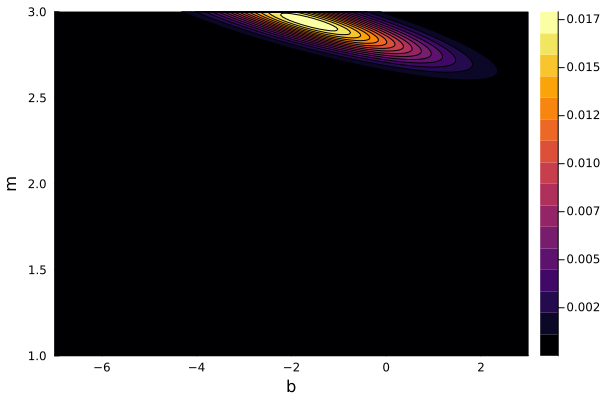

In [128]:
chi2bm(b,m) = Chisqr(b,m,x,y_observed2,sigma)
contourf(b_range,m_range,p_chi2bm,xlabel = "b", ylabel = "m")

# 2.7.2
The plot for the third case apears to have slope values that are tighter (not as spread out as 2.6). It appears more compressed and narrower with a slightly less steep slope. 

### 2.8

Change x back to x = 0:1:10

1. Redefine sigma = 5 and update y_observed. Plot the likelihood with the new y_observed and explain how the plot is different from 2.6
2. Redefine sigma = 1 and update y_observed. Plot the likelihood with the new y_observed and explain how the plot is different from 2.6

In [141]:
x = 0:1:10
y_true = 3 .* x .- 2
sigma = 5
# d = di.Normal(0,sigma)
# noise = rand(d,length(x))
noise = Random.rand(di.Normal(0,sigma),length(x))
y_observed3 = y_true .+ noise

11-element Vector{Float64}:
 -4.217532150643562
 -0.8636335194275637
 -1.153961151013128
  9.284132853128106
 12.940868290566096
 18.80491756393471
 19.186075416944377
 22.9763068832788
 26.323822105057836
 25.717261896855266
 18.232421626306966

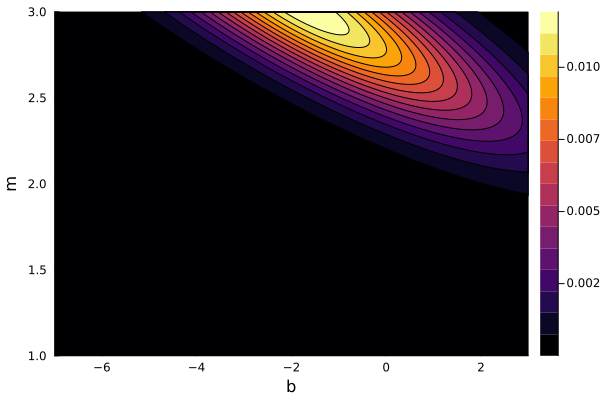

In [142]:
chi2bm(b,m) = Chisqr(b,m,x,y_observed3,sigma)
contourf(b_range,m_range,p_chi2bm,xlabel = "b", ylabel = "m")

# 2.8.1
The contour plot values for range and slope appear to include a wider set of values. It is slightly broader, or wider and extends slightly farther for both the m and b values than in the contour plot shown in 2.6. 

In [143]:
x = 0:1:10
y_true = 3 .* x .- 2
sigma = 1
# d = di.Normal(0,sigma)
# noise = rand(d,length(x))
noise = Random.rand(di.Normal(0,sigma),length(x))
y_observed4 = y_true .+ noise

11-element Vector{Float64}:
 -2.194074218952243
  0.5234416029756686
  3.491964036678696
  8.002966319333012
  9.689776362400458
 12.519269360084664
 16.104734755280962
 18.723068716907992
 21.89134753322941
 24.08793951990944
 27.39885611358044

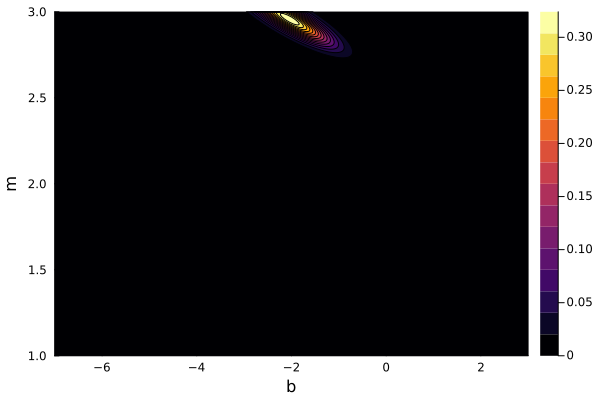

In [144]:
chi2bm(b,m) = Chisqr(b,m,x,y_observed4,sigma)
contourf(b_range,m_range,p_chi2bm,xlabel = "b", ylabel = "m")

In [ ]:
#2.8.2
The contour plot shown here is in general smaller in size, and the values for m and b do not extend as far as that shown in 2.6. However, it's slope appears steeper.